# DAT561 Final Project (Fall 2024)

In [1]:
print("All work is our own. No part was duplicated from another source")

All work is our own. No part was duplicated from another source


**Note**: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.


**Part 1**: 
75 points (85 points with the extra credits in the Bonus Question)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset here
Property_details = pd.read_csv("Property_details.csv")
Order_details = pd.read_csv("Order_details.csv")

### Question 1

**Part (a)**: How many unique cities are there in Bulgaria? 

**Part (b)**: What is the mean, standard deviation, median, min, and max of “latitude” for all properties in Bulgaria?


In [3]:
# Part (a):
Property_details.head(5)
Property_details.loc[Property_details.country == "Bulgaria", "city"].nunique()

256

In [4]:
# Part (b):
def latitude_function(group):
    result = {"avg_latitude": np.mean(group["latitude"]), "std_latitude": np.std(group["latitude"]),
             "mid_latitude": np.median(group["latitude"]), "min_latitude": np.min(group["latitude"]), "max_latitude": np.max(group["latitude"])}
    return pd.Series(result)
df1 = Property_details.groupby(by = ["country"]).apply(latitude_function)
df1.loc[df1.index == "Bulgaria", :]

C:\Users\Huixi\AppData\Local\Temp\ipykernel_8180\940342150.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = Property_details.groupby(by = ["country"]).apply(latitude_function)


,avg_latitude,std_latitude,mid_latitude,min_latitude,max_latitude
country,,,,,
Bulgaria,42.570888,0.556999,42.651459,41.318371,44.11549


### Question 2

**Part (a)**: Create a new column called "Recommendation", which is how well the property is recommended:

For ‘starrating’ of 5: Highly Recommended

For ‘starrating’ of 4 and above: Great Value

For ‘starrating’ of less than 4: Meh

**Part (b)**: Which country receives the largest amount of ‘Highly Recommended’ and ‘Great Value’?

In [5]:
# Part (a):
def recommendation(starrating):
    if starrating == 5:
        return "Highly Recommended"
    elif starrating >= 4:
        return "Great Value"
    else:
        return "Meh"
Property_details["Recommendation"] = Property_details["starrating"].apply(recommendation)
Property_details.head(5)

,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url,Recommendation
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...,Great Value
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...,Meh
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...,Meh
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...,Meh
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...,Meh


In [6]:
# Part (b):
df2 = Property_details
df3 = df2.loc[(df2.Recommendation == "Highly Recommended") | (df2.Recommendation == "Great Value"), :] \
     .groupby(by = ["country", "Recommendation"])["Recommendation"].count().reset_index(name = 'counts')
max_counts = df3.counts.max()
max_country = df3.loc[df3.counts == max_counts, ["country", "counts"]]
max_country

,country,counts
14,Italy,6196


### Question 3

**Part (a)**: In “ratedescription”, what is the mean of the largest 10 percent of room size? What about the mode of smallest 10 percent room size? 

**Part (b)**: In ‘rate type’ What is the probability of not having to pay at the hotel given free cancellation?


In [31]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
total = Order_details.ratedescription.str.contains("Room size").count()
total_10 = int(total*0.1)
df4 = Order_details
df4["room_size"] = df4.ratedescription.str.contains("Room size")
room_size = {}
for index, row in df4.iterrows():
    if row["room_size"] == True:
        room_size_m_square = row["ratedescription"].split(" ")[2]
        room_size_ft_square = row["ratedescription"].split(" ")[3].split("/")[1]
        if "m_square" in room_size.keys():
            room_size["m_square"].append(int(room_size_m_square))
        else:
            room_size["m_square"] = [int(room_size_m_square)]
        if "ft_square" in room_size.keys():
            room_size["ft_square"].append(int(room_size_ft_square))
        else:
            room_size["ft_square"] = [int(room_size_ft_square)]
def room_size_mode(list):
    count = {}
    for l in list:
        if l in count.keys():
            count[l] += 1
        else:
            count[l] = 1
    max_count = max(count.values())
    modes = [key for key, value in count.items() if value == max_count]
    return modes[0]
room_size_m_square_list = sorted(room_size["m_square"])
mean_largest_10_m = sum(room_size_m_square_list[-total_10:]) / total_10
mode_smallest_10_m = room_size_mode(room_size_m_square_list[0:total_10])
room_size_ft_square_list = sorted(room_size["ft_square"])
mean_largest_10_ft = sum(room_size_ft_square_list[-total_10:]) / total_10
mode_smallest_10_ft = room_size_mode(room_size_ft_square_list[0:total_10])
print("the mean of the largest 10 percent of room size: %0.2f m_square or %0.2f ft_square" %(mean_largest_10_m, mean_largest_10_ft))
print("the mode of the smallest 10 percent of room size: %0.2f m_square or %0.2f ft_square" %(mode_smallest_10_m, mode_smallest_10_ft))

the mean of the largest 10 percent of room size: 53.74 m_square or 578.47 ft_square
the mode of the smallest 10 percent of room size: 14.00 m_square or 151.00 ft_square


In [20]:
# If you displayed your output of 3(b) together with 3(a) please delete this cell
free_count = Order_details.ratetype.str.lower().str.contains("free cancellation").sum()
pay_count = Order_details.ratetype.str.lower().str.contains("pay at the hotel").sum()
prob = (int(free_count) - int(pay_count)) / int(free_count)
print("the probability of not having to pay at the hotel given free cancellation is %0.2f" %prob)

the probability of not having to pay at the hotel given free cancellation is 0.43


### Question 4

**Part (a)**: For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

**Part (b)**: For each property, calculate the mean and variance value of “replaced onsiteprice”, and store these two into corresponding two columns named “Mean” and “Variance”. Then create a column named “Standardized Mean” to store the standardized form of the “Mean” column. 


In [9]:
# Part (a):
mid_onsiteprice = Order_details.onsiteprice.median()
Order_details["replaced_onsiteprice"] = Order_details.onsiteprice
Order_details.replaced_onsiteprice.fillna(mid_onsiteprice)
Order_details.replaced_onsiteprice.isnull().sum()

0

In [10]:
# Part (b):
Order_details["Mean"] = Order_details.groupby('propertycode')['replaced_onsiteprice'].transform('mean')
Order_details["Variance"] = Order_details.groupby('propertycode')['replaced_onsiteprice'].transform('var')
def create_std_mean(row):
    Mean = row["Mean"]
    total_mean = Order_details.Mean.mean()
    total_std = Order_details.Mean.std()
    return (Mean - total_mean) / total_std
df_std_mean = Order_details[["Mean", "Variance"]].copy()
Order_details["Standardized_Mean"] = df_std_mean.apply(create_std_mean, axis = 1)
Order_details.head(5)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,room_size,replaced_onsiteprice,Mean,Variance,Standardized_Mean
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 m虏/161 ft虏, Shower, 1 king bed",Cancellation policy,...,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,True,82.36,100.098000,149.826973,-0.329301
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,False,636.09,636.090000,NaN,4.247240
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,False,591.74,498.396667,26138.933633,3.071552
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 m虏/215 ft虏, Shower, 3 single beds",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,True,881.48,612.893636,240656.372785,4.049179
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 m虏/215 ft虏, Shower, 3 single beds",Extra low price! (non-refundable),...,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,True,897.53,612.893636,240656.372785,4.049179


### Question 5

**Part (a)**: A party of four is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 4 or 2? Available hotel are those whose “propertytype” are “Hotels”, “closed” are “N”, and “hotelblock” are not “sold out” .

**Part (b)**: If this party does not want to pay a room for an average “replaced onsiteprice” higher than 230 per night, how many hotels are still available? Use the mean of “replaced onsiteprice” to compare with 230 due to price fluctuation. 


In [11]:
# Part (a):
df5 =  pd.merge(Order_details, Property_details, how="inner", left_on="propertycode", right_on="propertyid")
def available_hotel(row):
    maxoccupancy = row["maxoccupancy"]
    propertytype = row["propertytype"]
    closed = row["closed"]
    hotelblock = row["hotelblock"]
    if maxoccupancy == 4 or maxoccupancy == 2:
        if propertytype == "Hotels":
            if closed == "N":
                if hotelblock != "sold out":
                    return True
                else:
                    return False
            else:
                return False
        else:
            return False
    else:
        return False
df5["Available"] = df5.apply(available_hotel, axis = 1)
df6 = df5.loc[df5.Available == True, "propertycode"]
df6.nunique()

6162

In [12]:
# Part (b):
def still_available_hotel(row):
    avg_price = row["Mean"]
    init_available = row["Available"]
    if init_available == True and avg_price <= 230:
        return True
    else:
        return False
df5["still_available"] = df5.apply(still_available_hotel, axis = 1)
df7 = df5.loc[df5.still_available == True, "propertycode"]
df7.nunique()

5671

### Bonus Question:

Merge data, filter, groupby, merge three times

**Part (a)**: For each zip code, find the most expensive property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Part (b)**: For each zip code, find the cheapest property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Hint**: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.


In [13]:
# Part (a):
df8 = Order_details.merge(Property_details, how = "inner", left_on = "propertycode", right_on = "propertyid").loc[:, \
    ["propertycode", "propertyid", "city", "country", "zipcode", "address", "Mean"]]
most_expensive_properties = df8.groupby(by = ["zipcode"]).apply(lambda x: x.loc[x['Mean'].idxmax(),:])
most_expensive_properties

C:\Users\Huixi\AppData\Local\Temp\ipykernel_8180\1893170579.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_expensive_properties = df8.groupby(by = ["zipcode"]).apply(lambda x: x.loc[x['Mean'].idxmax(),:])


,propertycode,propertyid,city,country,zipcode,address,Mean
zipcode,,,,,,,
0.0,2096406,2096406,Bucharest,Romania,0.0,82-84 Izvor Street,81.724444
10.0,311599,311599,Tivoli,Italy,10.0,Via Del Teatro Latino 3,55.250000
12.0,7480547,7480547,Guidonia Montecelio,Italy,12.0,Via Pedica delle Ginestre 16-18,75.740000
40.0,1156010,1156010,Rome,Italy,40.0,Via Laurentina 554,79.586500
44.0,122548,122548,Frascati,Italy,44.0,Piazza del Gesu' 12,119.438889
...,...,...,...,...,...,...,...
905500.0,2562459,2562459,Mangalia,Romania,905500.0,Strada Frumoasei,95.885556
905700.0,8435130,8435130,Constanta,Romania,905700.0,Bulevardul Mamaia Nord 101 bis,117.419722
907105.0,1344141,1344141,Cumpana,Romania,907105.0,"Cumpana, comuna Arefu, judetul Arges",45.470000


In [14]:
# Part (b):
cheapest_properties = df8.groupby(by = ["zipcode"]).apply(lambda x: x.loc[x['Mean'].idxmin(),:])
cheapest_properties

C:\Users\Huixi\AppData\Local\Temp\ipykernel_8180\1919031233.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cheapest_properties = df8.groupby(by = ["zipcode"]).apply(lambda x: x.loc[x['Mean'].idxmin(),:])


,propertycode,propertyid,city,country,zipcode,address,Mean
zipcode,,,,,,,
0.0,162478,162478,Clonakilty,Ireland,0.0,Skibbereen Road,29.846000
10.0,311599,311599,Tivoli,Italy,10.0,Via Del Teatro Latino 3,55.250000
12.0,7480547,7480547,Guidonia Montecelio,Italy,12.0,Via Pedica delle Ginestre 16-18,75.740000
40.0,732366,732366,Ariccia,Italy,40.0,"Via Quarto Negroni, 46",49.511429
44.0,122556,122556,Frascati,Italy,44.0,Via Pietra Porzia 30 Frascati,37.316250
...,...,...,...,...,...,...,...
905500.0,396207,396207,Venus,Romania,905500.0,Str. Nicolae Iorga,85.998000
905700.0,8435130,8435130,Constanta,Romania,905700.0,Bulevardul Mamaia Nord 101 bis,117.419722
907105.0,1344141,1344141,Cumpana,Romania,907105.0,"Cumpana, comuna Arefu, judetul Arges",45.470000


### Part 2 (25 Points)

For this part, we look at the logic and how you solve the problems. 

***Part (a):*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results for each question. 
    

***Part (b):***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (5 points)
    2. You need to answer these five questions using Python and the two datasets. (5 points)
    3. You need to have at least "5" graphs to visualize your insights. (6 points)
    4. Your executive summary should be well-written. (6 points)
    5. Your results and business insights should be interesting and meaningful. (3 points)


**Note**: You may use this cell to write your 5 questions

**Question 1: What is the most common property type?** 

**Question 2: For hotels with different starratings, how do their price ranges change?** 

**Question 3: What are the numbers of hotel with different starratings?** 

**Question 4: Which countries have hotels more than the average?** 

**Question 5: For those countries have hotels more than the average, are the average starratings for each of them higher than the overall average starratings?** 

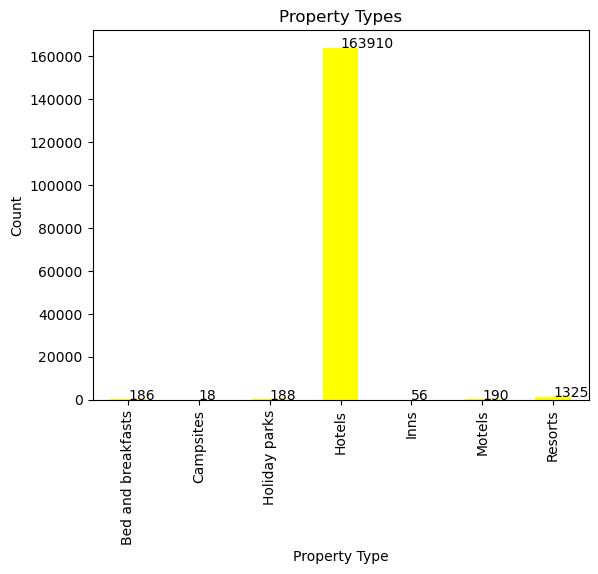

In [15]:
# Your code to answer Question 1
import matplotlib.pyplot as plt

property_type_counts = df5.groupby("propertytype")["propertycode"].count()

property_type_counts.plot(kind="bar", title="Property Types", color="yellow")
for i, value in enumerate(property_type_counts):
    plt.text(i, value, f"{value}")
plt.xlabel("Property Type")
plt.ylabel("Count")

plt.show()

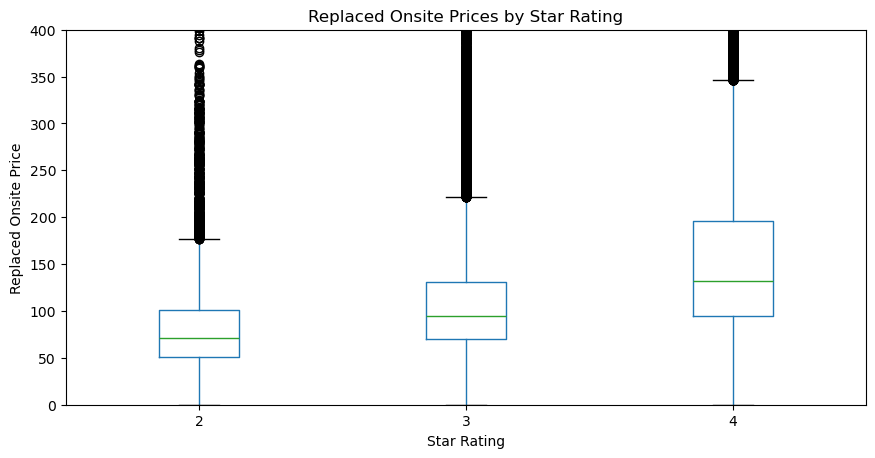

In [16]:
# Your code to answer Question 2
fig, ax2 = plt.subplots(figsize=(10, 5))  

df5.boxplot(column = "replaced_onsiteprice", by = "starrating", ax = ax2, grid=False)

ax2.set_title("Replaced Onsite Prices by Star Rating")  
ax2.set_xlabel("Star Rating")  
ax2.set_ylabel("Replaced Onsite Price")  
ax2.set_ylim(0, 400)
plt.suptitle("")

plt.show()

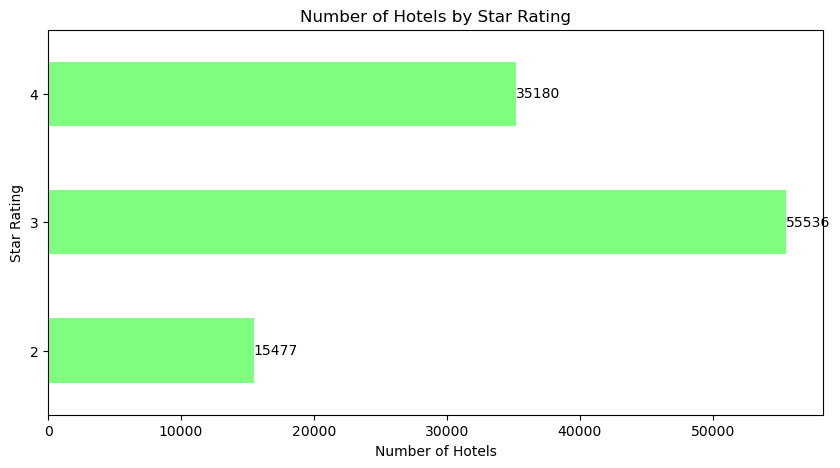

In [17]:
# Your code to answer Question 3
hotel_counts = Property_details.groupby("starrating")["propertytype"].count()

fig, ax = plt.subplots(figsize=(10, 5))
hotel_counts.plot(kind="barh", ax=ax, color="#7FFF7F", title="Number of Hotels by Star Rating")

for i, value in enumerate(hotel_counts):
    ax.text(value, i, f"{value}", va="center", ha="left", fontsize=10)
    
ax.set_xlabel("Number of Hotels")  
ax.set_ylabel("Star Rating")

plt.show()

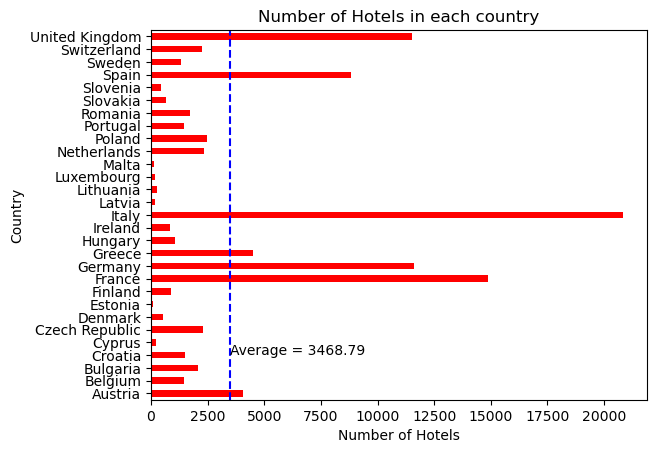

In [18]:
# Your code to answer Question 4
import matplotlib.pyplot as plt

fig, ax4 = plt.subplots()

Hotels_per_country = Property_details.loc[Property_details.propertytype == "Hotels", ["country", "propertyid"]]. \
    groupby("country")["propertyid"].count()

Hotels_per_country.plot(kind = "barh", title = "Number of Hotels in each country", color = "red", ax = ax4)

plt.xlabel("Number of Hotels")
plt.ylabel("Country")

mean_num_hotels = Hotels_per_country.mean()
ax4.axvline(mean_num_hotels, color = "b", linestyle = "--")
text1 = "Average = %0.2f" % mean_num_hotels
ax4.annotate(text1, xy = (mean_num_hotels+1,3))

plt.show()

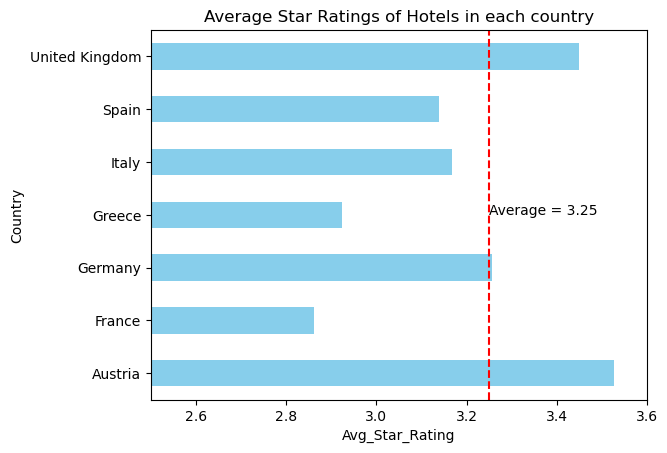

In [19]:
# Your code to answer Question 5
import matplotlib.pyplot as plt

countries_above_average = Hotels_per_country[Hotels_per_country > mean_num_hotels].index
Hotel_avg_star_country = Property_details.loc[(Property_details.propertytype == "Hotels") & \
    ((Property_details.country.isin(countries_above_average)))].groupby("country")["starrating"].mean()

fig, ax5 = plt.subplots()
Hotel_avg_star_country.plot(kind = "barh", ax = ax5, color = "skyblue", title = "Average Star Ratings of Hotels in each country")

ax5.set_xlabel("Avg_Star_Rating")  
ax5.set_ylabel("Country")
ax5.set_xlim([2.5,3.6])

mean_avg_starratings = Property_details.loc[(Property_details.propertytype == "Hotels")].groupby("country")["starrating"].mean().mean()
ax5.axvline(mean_avg_starratings, color = "red", linestyle = "--")
text1 = "Average = %0.2f" % mean_avg_starratings
ax5.annotate(text1, xy = (mean_avg_starratings,3))

plt.show()

### Executive Summary & Business insights:


**Note**: You need to use the cell below to write your executive summary & business insights.
If you need more space use enter to go to the next line.

**Question 1: What is the most common property type?** 

**Answer:** The most common property type is "hotel," with a total count of 163,910. This clearly indicates that hotels dominate the property landscape compared to other types.

**Question 2: For hotels with different starratings, how do their price ranges change?** 

**Answer:** As the star ratings increase, the price ranges also expand, meaning that higher-rated hotels tend to have greater price fluctuations. This suggests a wider variety of pricing options for higher-rated hotels, likely reflecting differences in amenities and services.

**Question 3: What are the numbers of hotel with different starratings?** 

**Answer:** Hotels with 2 stars total 15,477, while 3-star hotels account for 55,536. For 4-star hotels, the total is 35,180. These figures show that mid-tier hotels (3-star) are the most prevalent among the different star rating categories.

**Question 4: Which countries have hotels more than the average?** 

**Answer:** The countries with more hotels than the average are the United Kingdom, Spain, Italy, Greece, Germany, France, and Austria. These nations appear to be key players in the hospitality sector, likely due to their strong tourism industries.

**Question 5: For those countries have hotels more than the average, are the average starratings for each of them higher than the overall average starratings?** 

**Answer:** No, only two of these countries have an average star rating higher than the overall average. They are United Kingdom and Austria. This suggests that while some countries may have a high number of hotels, it does not necessarily correlate with higher average quality ratings.

### Grading:

PART 1 - 75 points (85 points with the extra credits in the Bonus Question)

- Question 1: 9 points (6 points for part (a) and 3 points for part (b))
- Question 2: 15 points (9 points for part (a) and 6 points for part (b))
- Question 3: 12 points (9 points for part (a) and 3 points for part (b))
- Question 4: 21 points (9 points for part (a) and 12 points for part (b))
- Question 5: 18 points (9 points for part (a) and 9 points for part (b))
- Bonus Question: 10 points (extra credit): (8 points for part (a) and 2 points for part (b))




PART 2 - 25 points 
- You need to ask five business-related questions (5 points).
- You need to answer these five questions using Python and the two datasets (5 points).
- You need to have at least "5" graphs to visualize your insights (6 points).
- Your executive summary should be well-written (6 points).
- Your results and business insights should be interesting and meaningful (3 points).


Good Luck!